In [118]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3, 
        font='Computer Modern Sans serif', 
        style="whitegrid", 
        rc={'text.usetex' : True})

In [119]:
vis_csv = pd.read_csv('annotationsForVis.csv')
csv = pd.read_csv('annotations.csv')
proc_csv = pd.read_csv('processedAnnotations.csv')

In [120]:
vis_csv['assunto'] = vis_csv['assunto'].astype('category')
vis_csv['palavra'] = vis_csv['palavra'].astype('category')
vis_csv['classe_gramatical'] = vis_csv['classe_gramatical'].astype('category')
vis_csv['letra'] = vis_csv['letra'].astype('category')
vis_csv['CM'] = vis_csv['CM'].astype('category')

vis_csv['assunto'] = vis_csv['assunto'].str.capitalize()
vis_csv['palavra'] = vis_csv['palavra'].str.capitalize()
vis_csv['classe_gramatical'] = vis_csv['classe_gramatical'].str.capitalize()

In [121]:
countLetters = vis_csv.groupby(['letra']).count()
countS = vis_csv.groupby(['assunto']).count()
countCM = vis_csv.groupby(['CM']).count()['letra']
countCG = vis_csv.groupby(['classe_gramatical']).count()['CM']

In [136]:
vis = vis_csv.copy()

In [137]:
vis = vis.sort_values(by='classe_gramatical')

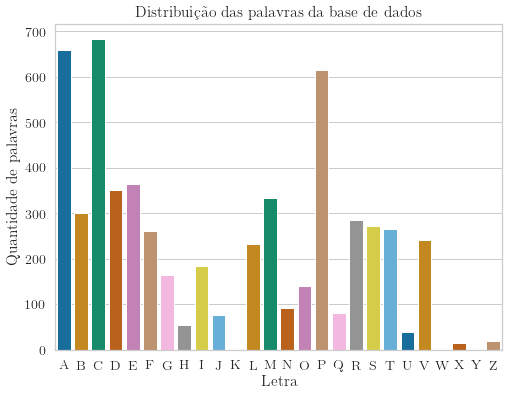

In [113]:
fig = plt.gcf()
fig.set_size_inches(8, 6)


ax = sns.barplot(x=countLetters.index, y=countLetters['palavra'], data=countLetters, palette='colorblind')
ax.set(ylabel="Quantidade de palavras", xlabel="Letra", title="Distribuição das palavras da base de dados")

fig.savefig('barplot_quantity_letter.eps', format='eps', dpi=1200, bbox_inches = 'tight')

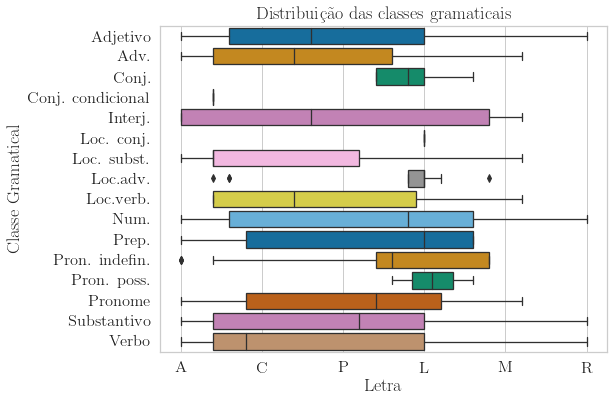

In [147]:
sns.set(font_scale=1.5, 
        font='Computer Modern Sans serif', 
        style="whitegrid", 
        rc={'text.usetex' : True})

fig = plt.gcf()
fig.set_size_inches(8, 6)

ax = sns.boxplot(data=vis, y="classe_gramatical", x=vis['letra'].cat.codes, 
                 orient="h", palette="colorblind", linewidth=1.3)

ax.set_xticklabels(vis['letra'].unique())
ax.set(ylabel="Classe Gramatical", xlabel="Letra", 
       title="Distribuição das classes gramaticais")

fig.savefig('boxplot_class_letter.eps', format='eps', dpi=1200, bbox_inches = 'tight')

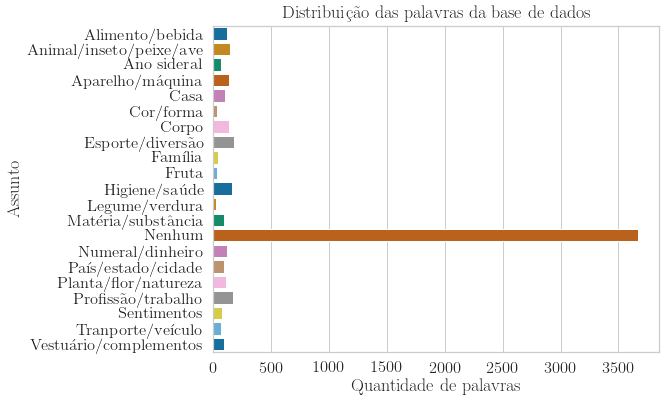

In [148]:
sns.set(font_scale=1.5, 
        font='Computer Modern Sans serif', 
        style="whitegrid", 
        rc={'text.usetex' : True})
fig = plt.gcf()
fig.set_size_inches(8, 6)


ax = sns.barplot(y=countS.index, x=countS['palavra'], data=countS, palette='colorblind', orient='h')
ax.set(ylabel="Assunto", xlabel="Quantidade de palavras", title="Distribuição das palavras da base de dados")

fig.savefig('barplot_quantity_subject.eps', format='eps', dpi=1200, bbox_inches = 'tight')